In [40]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [41]:
data= pd.read_csv('popdata.csv', parse_dates=True)
df = data[data['pop_name'] == "Rusa alfredi (Visayan Spotted Deer)"]
df = df[['pop_date','population_no']]
df['pop_date'] = pd.to_datetime(df['pop_date'])
df = df.groupby('pop_date')['population_no'].sum().reset_index()
df = df.set_index('pop_date')
df.index

DatetimeIndex(['2016-01-04', '2016-02-01', '2016-03-07', '2016-04-04',
               '2016-05-02', '2016-06-06', '2016-07-04', '2016-08-01',
               '2016-09-05', '2016-10-30', '2016-11-07', '2016-12-05',
               '2017-01-03', '2017-02-06', '2017-03-06', '2017-04-03',
               '2017-05-02', '2017-06-05', '2017-07-03', '2017-08-07',
               '2017-09-04', '2017-10-02', '2017-11-06', '2017-12-04',
               '2018-01-03', '2018-02-05', '2018-03-05', '2018-04-02',
               '2018-05-07', '2018-06-04', '2018-07-02', '2018-08-06',
               '2018-09-03', '2018-10-01', '2018-11-05', '2018-12-07',
               '2019-01-07', '2019-02-04', '2019-03-04', '2019-04-01',
               '2019-05-06', '2019-06-03', '2019-07-01', '2019-08-05',
               '2019-09-02', '2019-10-07', '2019-11-04', '2019-12-02',
               '2020-01-06', '2020-02-03', '2020-03-02', '2020-04-06',
               '2020-05-04', '2020-06-01', '2020-07-06', '2020-08-03',
      

In [42]:
y = df['population_no'].resample('M').mean()

In [43]:
y['2016':]

pop_date
2016-01-31    14.0
2016-02-29    14.0
2016-03-31    14.0
2016-04-30    14.0
2016-05-31    14.0
              ... 
2021-07-31    18.0
2021-08-31    18.0
2021-09-30    18.0
2021-10-31    18.0
2021-11-30    18.0
Freq: M, Name: population_no, Length: 71, dtype: float64

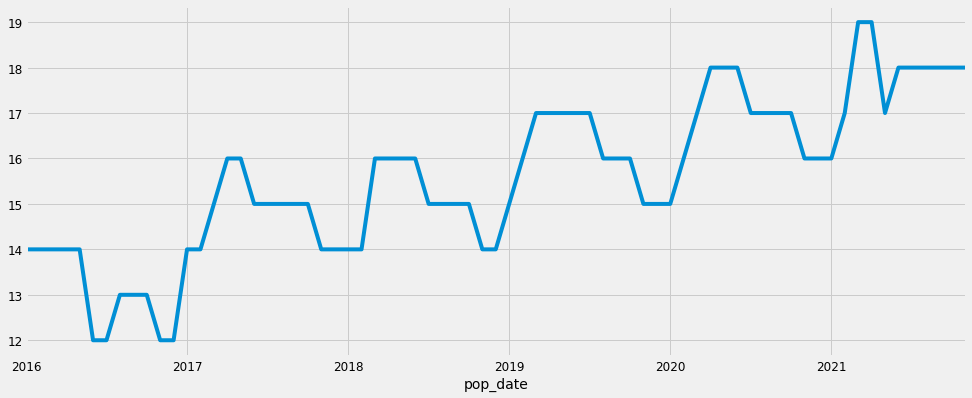

In [44]:
y.plot(figsize=(15, 6))
plt.show()

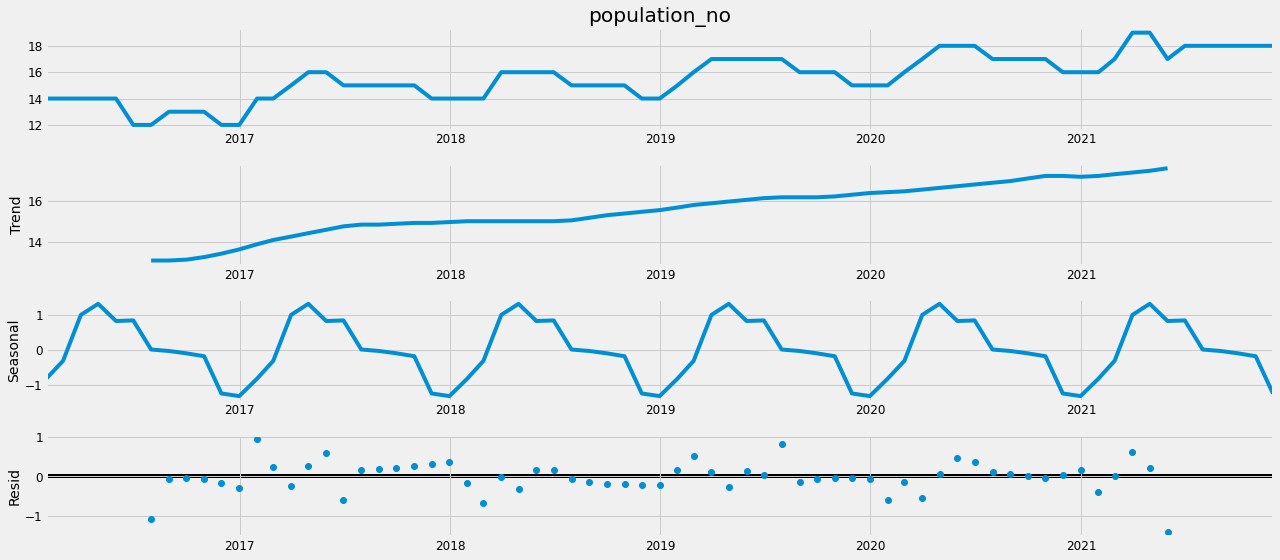

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [46]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:586.2478231249456
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:443.9242511657476
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:192.7210266198497
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:129.73096589746376
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:154.42019719815508
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:140.25073328569346
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:128.75702379060397
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:127.68324344780522
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:490.3853882299134
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:364.8585221101169
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:148.95616417524263
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:106.04200413844565
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:157.1851934931485
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:160.6739564238531
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:109.76212759476594
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:105.9193653074609
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:160.192851099018
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:119.48935701751894
AR

In [55]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3302      0.364      0.906      0.365      -0.384       1.044
ma.L1         -0.9585      0.175     -5.469      0.000      -1.302      -0.615
ar.S.L12      -0.3553      0.110     -3.232      0.001      -0.571      -0.140
ma.S.L12      -0.1739      0.266     -0.654      0.513      -0.695       0.347
sigma2         0.2713      0.061      4.475      0.000       0.152       0.390


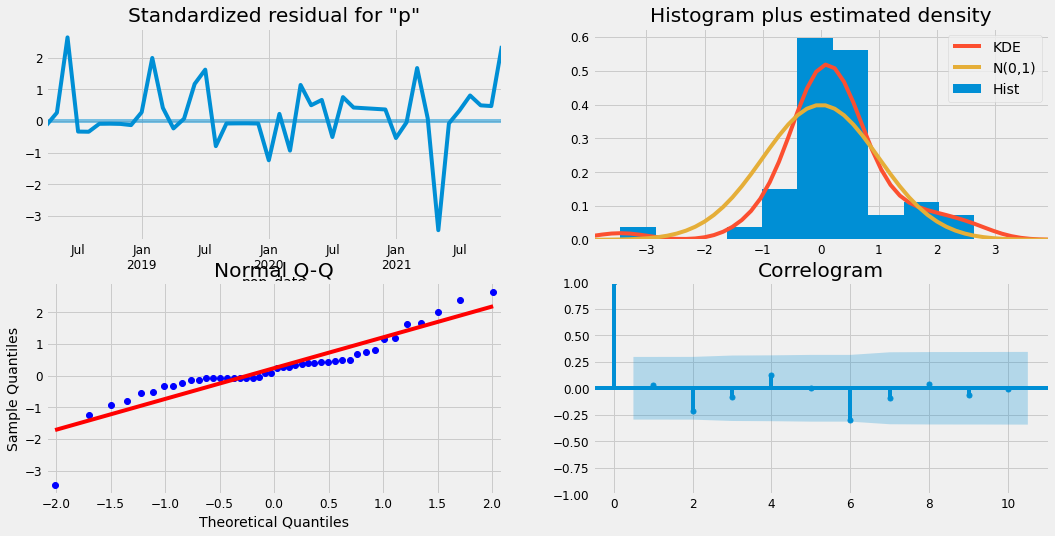

In [56]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

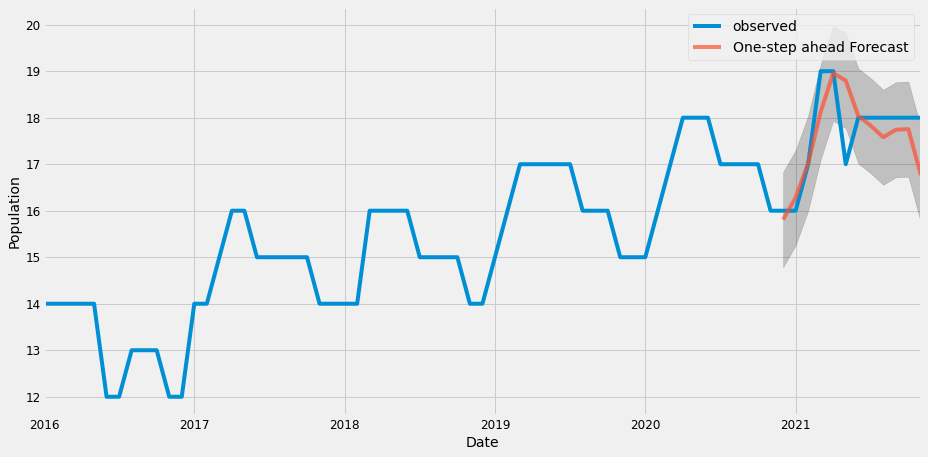

In [57]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()

In [58]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-12-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.5


In [59]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.71


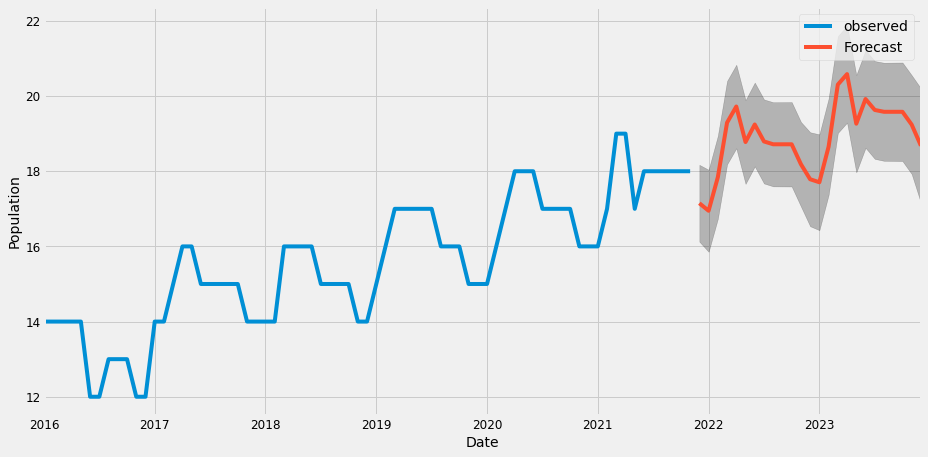

In [60]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()

In [54]:
pred_uc.predicted_mean

2021-12-31    17.132499
2022-01-31    17.346181
2022-02-28    18.264562
2022-03-31    19.815110
2022-04-30    20.098328
2022-05-31    19.077706
2022-06-30    19.512221
2022-07-31    19.200162
2022-08-31    19.098328
2022-09-30    19.098328
2022-10-31    19.098328
2022-11-30    18.608638
2022-12-31    18.165943
2023-01-31    18.379625
2023-02-28    19.298007
2023-03-31    20.848554
2023-04-30    21.131772
2023-05-31    20.111150
2023-06-30    20.545665
2023-07-31    20.233606
2023-08-31    20.131772
2023-09-30    20.131772
2023-10-31    20.131772
2023-11-30    19.642082
2023-12-31    19.199387
Freq: M, Name: predicted_mean, dtype: float64